### Data Analysis
- 원시(원본 그대로) 데이터 분석을 하여 인사이트(가시성 증가 미 깊은 이해)로 변환하는 작업이다.
- 문제를 해결하지 위해 데이터를 사용해서 흐름 및 방향을 찾는 기술이다.
- 데이터 분석을 통해 비지니스 프로세스를 구성하고, 의사결정을 개선하며, 비지니스 성장을 증진할 수 있다.

비즈니스 프로세스


<img src="./images/architecture.png" width="900px" style="margin-left: 10px;">
** <sub>ETL = Extract(추출), Transform(변환), Load(적재)를 의미한다. 여기저기 흩어진 데이터를 하나로 모으기 위한 결합과정이다.

3가지 단계를 통해 모인 데이터를 DATA WAREHOUSE라고 한다.

스키마 : 데이터 베이스의 구조와 제약조건(not null, integerfeild 등)
RDB => relation data base
NoSQL => 스키마가 없는 SQL : 속도에 중점을 둔 SQL (채팅 등에 사용)
object 저장소 => serializer을 사용해서 문자열로 저장하는 것(캐시)</sub>

### 기초 통계(Basic statistics)
📌 통계는 아직 발생하지 않은 일을 예측하기 위해 사용한다.
- 통계학을 공부하는 데에 있어 필요한 기본 개념이고,
  수량적인 비교를 기초로 많은 사실을 관찰하고 처리하는 방법을 연구하는 학문이다.
- 불균형 데이터를 대상으로 규칙성과 불규칙성을 발견한 뒤 실생활에 적용할 수 있다.
<img src="./images/statistics01.png" style="margin-top: 20px">

#### 변량(Variable)
- 자료의 수치를 변량이라고 하며, 이는 데이터의 값을 의미한다.

In [10]:
# 지역별 총 100명의 키 생성
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(151,190,size=(10,10)),\
             columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))
display(df)

,서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원
0,170,164,172,158,174,178,166,178,167,155
1,162,187,188,170,175,180,158,185,161,153
2,152,154,157,171,185,179,169,151,162,157
3,153,158,166,169,187,170,153,158,172,159
4,186,172,164,179,160,187,184,189,165,175
5,159,181,174,174,188,151,172,186,185,172
6,166,170,167,153,179,159,170,185,171,164
7,180,184,157,152,151,155,174,185,184,170
8,168,169,160,163,167,163,175,151,152,161
9,176,151,172,187,175,167,179,180,164,160


In [13]:
%%timeit -n 100 -r 10

import pandas as pd
import random

df = pd.DataFrame([[random.randrange(151, 190) for _ in range(10)] for _ in range(10)], \
                  columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

171 µs ± 38.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [12]:
%%timeit -n 100 -r 10

# 지역별 총 100명의 키 생성
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randint(151,190,size=(10,10)),\
             columns="서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원".split(","))

40.8 µs ± 6.08 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


#### 계급(Class)
-  변량을 일정 간격으로 나눈 구간을 의미한다.
-  변량의 최소값과 최대값을 잘 고려해서 계급을 정해야한다.
-  예) (150,160]의 계급일 경우 160까지 속한다. 즉 151~160까지 이다. (미포함, 포함)

In [16]:
df_seoul = df['서울']
df_class = pd.cut(df_seoul, bins=[150,160,170,180,190])
df_seoul_class = pd.DataFrame({'서울':df_seoul,'계급':df_class})
df_seoul_class

,서울,계급
0,170,"(160, 170]"
1,162,"(160, 170]"
2,152,"(150, 160]"
3,153,"(150, 160]"
4,186,"(180, 190]"
5,159,"(150, 160]"
6,166,"(160, 170]"
7,180,"(170, 180]"
8,168,"(160, 170]"
9,176,"(170, 180]"


#### 도수 (Frequency)
- 각 **계급**에 속하는 변량의 개수를 의미한다.

In [19]:
df_seoul_class.groupby('계급',observed=True).count()
# observed=False : 값이 0인 변량도 보여주는 것

,서울
계급,
"(150, 160]",3
"(160, 170]",4
"(170, 180]",2
"(180, 190]",1


#### 상대 도수 (Relative Frequency)
- 각 계급에 속하는 변량의 비율을 의미한다.

In [21]:
df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x/100)

,서울
계급,
"(150, 160]",0.03
"(160, 170]",0.04
"(170, 180]",0.02
"(180, 190]",0.01


#### 도수 분포표 (Frequency Table)
- 주어진 자료를 계급별로 나눈 뒤 각 계급에 속하는 도수 및 상대 도수를 조사한 표이다.
- 구간 별 분포를 한 번에 알아 보기 좋지만 계급별 각 변량의 정확한 값이 생략되어 있다.

In [24]:
freq_df = pd.DataFrame({"도수":df_seoul_class.groupby('계급', observed=False).count()['서울'], \
              "상대도수": df_seoul_class.groupby('계급', observed=False).count().apply(lambda x: x/100)["서울"]})
display(freq_df)

,도수,상대도수
계급,,
"(150, 160]",3,0.03
"(160, 170]",4,0.04
"(170, 180]",2,0.02
"(180, 190]",1,0.01


In [26]:
freq_df.reset_index(drop=False)
# drop => 기존 인덱스의 사용 유무 (False면 기존 인덱스는 칼럼으로 들어감)

,계급,도수,상대도수
0,"(150, 160]",3,0.03
1,"(160, 170]",4,0.04
2,"(170, 180]",2,0.02
3,"(180, 190]",1,0.01


#### 히스토그램 (Histogram)
- 도수분포표를 시각화한 그래프이다

<Axes: >

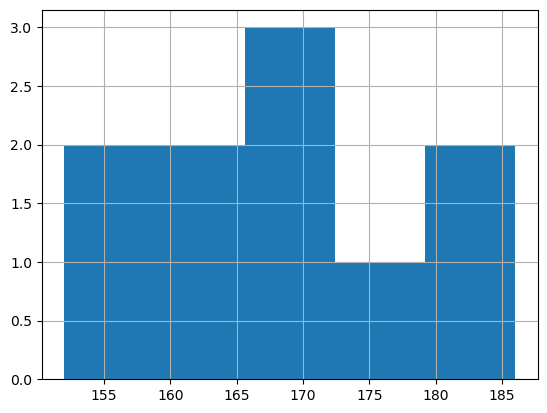

In [29]:
import matplotlib.pyplot as plt
import numpy as np

df_seoul_class['서울'].hist(bins=5)

#### 산술 평균 (Mean)
- 변량의 합을 변량의 수로 나눈 값을 의미한다.

<img src="./images/mean.png" style="margin-left 20px">

In [30]:
df.mean(axis=0).to_frame(name='평균키')

,평균키
서울,167.2
경기,169.0
인천,167.7
광주,167.6
대구,174.1
부산,168.9
전주,170.0
강릉,174.8
울산,168.3
수원,162.6


#### 편차 (Deviation)
- 변량에서 평균을 뺀 값이다.
- 각 변량의 편차를 구한 뒤 모두 합하면 0이 되기 때문에 편차의 평균은 구할 수 없다.

In [39]:
gyunggi_df=df["경기"].to_frame()
gyunggi_df["편차"] = gyunggi_df["경기"].apply(lambda x:x - gyunggi_df.mean())
display(gyunggi_df)

# e가 붙어있는 수는 엄청 작은 수나 엄청 큰 수를 간략화 해쥬는 기능
# 이 때, e는 자연 상수가 아니며, 과학적 기수법 e라고 한다.
# a(e)b = a*10^b

print(gyunggi_df['편차'].sum())

#실수의 오류를 원래 값으로 변경하고자 반올림(round) 사용
total = round(gyunggi_df['편차'].sum())
print(f'편차의 합: {total}')

,경기,편차
0,164,-5.0
1,187,18.0
2,154,-15.0
3,158,-11.0
4,172,3.0
5,181,12.0
6,170,1.0
7,184,15.0
8,169,0.0
9,151,-18.0


0.0
편차의 합: 0


In [40]:
df.describe()

,서울,경기,인천,광주,대구,부산,전주,강릉,울산,수원
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,167.200000,169.000000,167.70000,167.600000,174.100000,168.900000,170.000000,174.800000,168.300000,162.600000
std,11.213088,12.463279,9.39326,11.236844,11.957796,11.957796,9.261629,15.244671,10.198584,7.471427
min,152.000000,151.000000,157.00000,152.000000,151.000000,151.000000,153.000000,151.000000,152.000000,153.000000
25%,159.750000,159.500000,161.00000,159.250000,168.750000,160.000000,166.750000,163.000000,162.500000,157.500000
50%,167.000000,169.500000,166.50000,169.500000,175.000000,168.500000,171.000000,182.500000,166.000000,160.500000
75%,174.500000,178.750000,172.00000,173.250000,183.500000,178.750000,174.750000,185.000000,171.750000,168.500000
max,186.000000,187.000000,188.00000,187.000000,188.000000,187.000000,184.000000,189.000000,185.000000,175.000000


#### 분산 (Variance)
- 변량이 평균으로부터 떨어져 있는 정도를 보기 위한 통계량이다.
- 편차에 제곱하여 그 합을 구한 뒤 산술 평균을 낸다.

<img src="./images/variance.png" style="margin-left:10px">

In [44]:
gyunggi_df['편차의 제곱(분산)'] = gyunggi_df["편차"].apply(lambda x:x**2)
display(gyunggi_df)
variance = gyunggi_df['편차의 제곱(분산)'].mean()
print(f'분산: {round(variance,2)}')

,경기,편차,편차의 제곱(분산)
0,164,-5.0,25.0
1,187,18.0,324.0
2,154,-15.0,225.0
3,158,-11.0,121.0
4,172,3.0,9.0
5,181,12.0,144.0
6,170,1.0,1.0
7,184,15.0,225.0
8,169,0.0,0.0
9,151,-18.0,324.0


분산: 139.8


#### 표준편차 (Standard deviation)
- 분산의 제곱근이며, 관측된 변량의 흩어진 정도를 하나의 수치로 나타내는 통계량이다.
- 표준편차가 작을 수록 평균 값에서 변량들의 거리가 가깝다고 판단한다.

<img src="./images/standard_deviation.png" style="margin-left:15px">

In [46]:
import math

std = math.sqrt(variance)
print(f'표준 편차: {std}')

표준 편차: 11.823705003085962


#### 확률 (Random variable)
- 머신러닝, 딥러닝 등 확률을 다루는 분야에 있어서 필수적인 개념이다.
- 확률 (Probability)이 있다는 뜻은 사건(event)이 있다는 뜻이며, 시행(trial)을 해야 시행의 결과인 사건(event)이 나타난다.
- 시행(trial)을 해서 어떤 사건(event)이 나타났는지에 따라 값이 정해지는 변수이다.
- 알파벳 대문자로 표현하며, X,Y,Z 또는 x<sub>1</sub>, y<sub>1</sub>, z<sub>1</sub>과 같이 표현한다.
- 확률 변수는 집합이며, 원소를 확률 변수값(Value of Random Variable)이라고 표현한다. 확률변수에서 사용한 알파벳의 소문자를 사용한다.
- Y = {y<sub>1</sub>,y<sub>2</sub>,y<sub>3</sub>}, 이 때 Y는 확률 변수이고, 원소인 y<sub>1</sub>~y<sub>3</sub>은 확률 변수값이다.

<img src="./images/random_variable.jpg" width="700px" style="margin-left:15px">

#### 범주형 확률변수 (Categorical random variable)

- 범주형 확률변수값은 수치가 아닌 기호나 언어, 숫자등으로 표현하고, 기호나 언어는 순서를 가질 수도 있다.
- 유한 집합으로 표현한다. 유한 집합은 원소의 수가 유한한 집합을 의미한다.
- {앞면, 뒷면}, {동의, 비동의}, {선택, 미선택}, {봄,여름,가을,겨울}

#### 이산형 확률변수 (Discrete random variable)
- 이산형 확률변수 값은 수치로 표현하고 셀 수 있는 값이다. 이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률 변수라고도 부른다.
- 유한집합 또는 셀수 있는 무한 집합으로 표현한다. 무한 집합은 원소의 수가 무한한 집합을 의미한다.
- {0,1,2,3}, {10,20,30}, {1,2,3,...}, {100,1000,10000}

#### 연속형 확률변수 (Continuous random variable)
- 연속형 확률 변수는 구간을 나타내는 수치로 표현한다. 이를 더 넓은 범위로, 양적 확률변수 또는 수치형 확률 변수라고도 부른다.
- 셀 수 없는 무한 집합으로 표현한다.
- 128.56 < X < 268.56

#### 확률 분포 (Probability distribution)
- 사건에 대한 확률 변수에서 정의된 모든 확률값의 분포이며, 서로 다른 모든 결과의 출현 확률을 제공한다.
> <strong>1) 동전 던지기(시행)</strong>  
> <strong>2) {0, 1} (확률변수와 확률변수값)</strong>  
> <strong>3) 완벽한 형태의 동전일 경우의 확률 분포</strong>  
>
> <img src="./images/probability_distribution01.png">  
> 
> 
> <strong>1) 1~12까지 새겨진 주사위 던지기 (시행)</strong>  
> <strong>2) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12} (확률변수와 확률변수값)</strong>  
> <strong>3) 완벽한 형태의 주사위 경우의 확률 분포</strong>  
>
> <img src="./images/probability_distribution02.png">

#### 확률 분포표 (Probability distributioin table)
- 확률변수의 모든 값(원소)에 대해 확률을 표로 표시한 것이다.
- 범주형 또는 이산형 확률 변수의 확률 분포를 표현하기에 적합한 방식이다.

In [54]:
import numpy as np
import pandas as pd

df_h_dist = pd.DataFrame(np.arange(0,100) % 4 + 1, columns=["경주마 번호"])

df_h_dist_group = df_h_dist.groupby('경주마 번호')['경주마 번호'].count().reset_index(name = "1등 횟수")

df_h_dist_group['1등할 확률'] = df_h_dist_group["1등 횟수"] /100
display(df_h_dist_group)

,경주마 번호,1등 횟수,1등할 확률
0,1,25,0.25
1,2,25,0.25
2,3,25,0.25
3,4,25,0.25


#### 확률분포함수(Probability distribution function)
- 확률변수의 분포를 나타내는 함수로서, 확률 변수의 확률변수값이 나올 확률을 나타내는 함수이다.
- 확률 질량 함수, 확률 밀도함수 등의 함수가 있다.

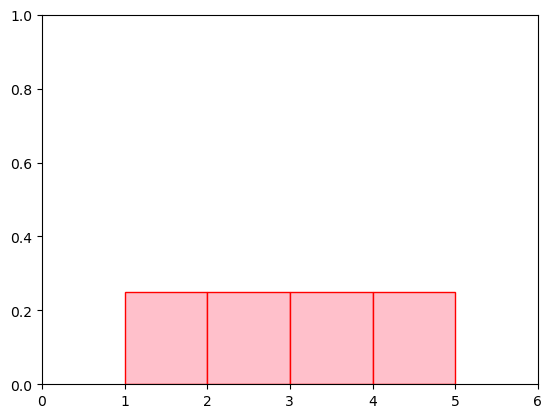

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h_dist["경주마 번호"],range(1,6), density=True, color="pink", edgecolor="red")
plt.xlim(0,6)
plt.ylim(0,1)
plt.show()

#### 확률 질량 함수 (Probability mass function, pmf)
- 확률변수 X의 분포를 나타내는 함수로서, x<sub>i</sub> 가 나올 확률이다.
- 확률 변수의 값을 매개변수로 전달받고, 해당 값이 나타날 확률을 구해서 리턴하는 함수이다.
- 범주형 확률변수와 이산형 확률변수에서 사용된다.
- 확률 변수에서 각 값에 대한 확률을 나타내는 것이 마치 각 값이 "질량"을 가지고 있는 것 처럼 보이기 때문에 확률 질량 함수로 불린다.

> 확률 질량 함수 f는 확률 변수 X가 x를 변수값으로 가질 때의 확률이다.  
> <img src="./images/pmf01.png" style="margin-top: 10px">  
> <img src="./images/pmf02.png">  
> <img src="./images/pmf03.png">  

In [61]:
import numpy as np
import pandas as pd

df_h = pd.DataFrame(np.random.randint(1,5,size =(100,1)), columns=["경주마 번호"])
df_h_group = df_h.groupby('경주마 번호')['경주마 번호'].count().reset_index(name="1등한 횟수")

df_h_group["1등할 확률"]= df_h_group["1등한 횟수"]/100

display(df_h_group)

,경주마 번호,1등한 횟수,1등할 확률
0,1,26,0.26
1,2,21,0.21
2,3,34,0.34
3,4,19,0.19


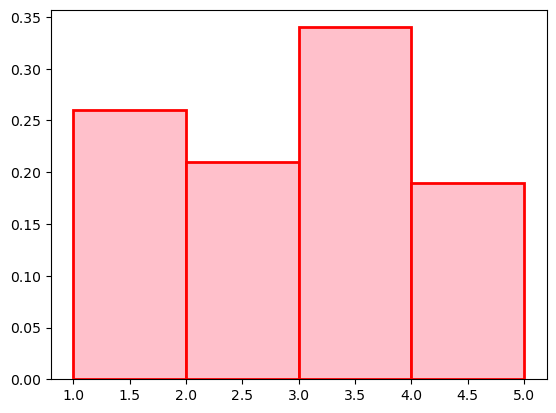

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_h['경주마 번호'],range(1,6),density=True\
         ,color = "pink", edgecolor="red", linewidth= 2)
plt.show()

#### 무한대 (Infinity)
- 끝없이 커지는 상태를 의미하고 기호로 ∞ 를 사용한다.

#### 무한소 0 (Infinitesimal)
- 거의 없다는 의미이고, 0에 매우 근접하지만 0이 아닌 상태를 의미한다.

#### 미분 (Differential)
- 기울기는 독립변수가 종속변수에 미치는 영향력의 크기를 의미한다.
- 변경 전의 독립변수 x<sub>1</sub>이라는 점과 변경 후의 x<sub>2</sub>라는 점을 지나는 직선의 기울기가 바로 변화에 대한 속도이다.
- 즉, 직선의 기울기가 4로 구해졌다면, 종속변수가 독립변수의 변화에 4배 속도로 변화된 것이다.
- 이 때, 두 점 사이가 무한히 가까워지면, 결국 거의 한점과 같은 점에 대한 접선의 기울기가 되고 이는 순간적인 변화량이다.
- 미분을 통해서 독립변수가 굉장히 미세하게 변화할 때 순간적으로 종속 변수가 얼마나 빠르게 변화하는 지 알 수 있다.

#### 적분 (integral)
- 선분 = 높이(길이), 면적 = 가로 X 높이
- 면적을 구할 때 여러 사각형으로 구한 뒤 합하여도 전체 면적이 나온다.
- 가로가 무한소 0인 사각형 즉, 선분과 거의 비슷한 사각형을 쌓은 뒤 각 면적을 모두 합하는 것이 적분이다.

#### 확률 밀도 함수 (Probability density function, pdf)
- 확률변수 X의 분포를 나타내는 함수로서, 특정 구간에 속할 확률이고 이는 특정 구간을 적분한 값이다.
- 확률 변수값의 범위(구간)를 매개변수로 전달 받고, 범위의 넓이를 구해서 리턴하는 함수이다.
- 연속형 확률 변수에서 사용된다.
- 전체에 대한 확률이 아닌 구간에 포함될 확률을 나타내기 떄문에 구간에 따른 밀도를 구하는 것이고, 이를 통해 확률밀도 함수라 불린다.

> 확률밀도 함수 f는 특정 구간에 포함될 확률을 나타낸다.  
> <img src="./images/pdf01.png" style="margin-top: 10px">  
> <img src="./images/pdf02.png">  
> <img src="./images/pdf03.png">    
> <img src="./images/pdf04.png">    

구간 [-1, 2]에서의 확률: 0.8185946141203638


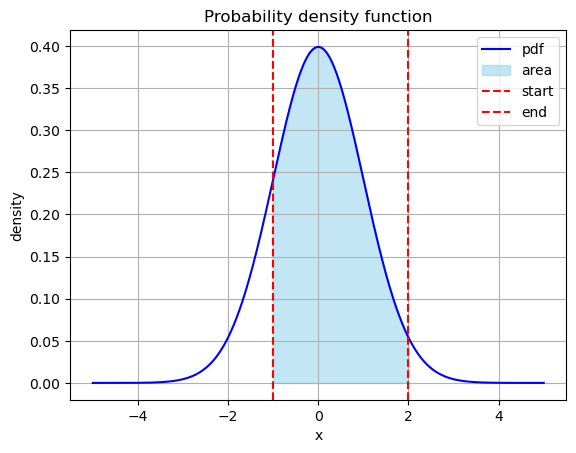

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 임의의 확률밀도 함수 정의
def pdf(x):
    # 정규분포
    mu = 0
    sigma = 1
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((x - mu) / sigma) ** 2 / 2)

# 랜덤한 구간
a = -1
b = 2

def calculate_probability_in_range(a, b):
    probability, _ = quad(pdf, a, b)
    return probability

probability = calculate_probability_in_range(a, b)
print(f'구간 [{a}, {b}]에서의 확률: {probability}')

x_values = np.linspace(-5, 5, 10000)
y_values = pdf(x_values)

plt.plot(x_values, y_values, label='pdf', color='blue')
plt.fill_between(x_values, y_values\
                 , where=(x_values >= a) & (x_values <= b)\
                 , color='skyblue', alpha=0.5, label='area')
plt.axvline(x=a, linestyle='--', color='red', label='start')
plt.axvline(x=b, linestyle='--', color='red', label='end')
plt.xlabel('x')
plt.ylabel('density')
plt.title('Probability density function')
plt.legend()
plt.grid(True)
plt.show()

#### 정규분포 (Normal distribution)
- 모든 독립적인 확률 변수들의 평균은 어떠한 분포에 가까워지는데, 이 분포를 정규분포라고 한다.
- 즉, 비정규분포의 대부분은 극한상태에 있어서 정규분포에 가까워진다.

<img src="./images/normal_distribution04.png" width="500px"> <img src="./images/normal_distribution03.png" width="500px">  
- 평균 μ(mu)와 표준편차 σ(sigma)에 대해 아래의 확률밀도함수를 가지는 분포를 의미한다.
<div style="display:flex">
    <div>
        <img src="./images/normal_distribution02.png" width="230px" style="margin-left:20px">
    </div>
</div>    
<div style="display:flex">
    <div>
        <img src="./images/normal_distribution01.png" width="700px" style="margin-left:20px">
    </div>
</div>  

#### 표준 정규분포 (Standart normal distribution)
- 정규분포는 평균과 표준편차에 따라서 모양이 달라진다.
  
<img src="./images/standard_normal_distribution01.png" width="400px">

- 정규분포를 따르는 분포는 많지만, 각각의 평균과 표준편차가 달라서 일반화 할 수는 없다.
- N(μ,σ)= N(0,1)로 만든다면 모두 같은 특성을 가지는 동일한 확률 분포로 바꿔서 일반화 할 수 있다.
- 따라서, 일반 정규분포를 표준 정규분포로 바꿔준 뒤 표준 정규분포의 특정 구간의 넓이를 이용해서 원래 분포의 확률을 구할 수 있다.

<img src="./images/standard_normal_distribution02.png" width="550px">

#### 표준화 (Standardization)
- 다양한 형태의 정규분포를 표준 정규 분포로 변환화는 방법이다.
- 표준 정규분포에 대한 값(넓이)를 이용해 원래 분포의 확률을 구할 수 있다.

<img src="./images/standardization01.png" style="margin-left:20px">  

<img src="./images/standardization02.png" style="margin-left:20px">

#### 모집단과 모수 (Population and population parameter)
- 모집단이란, 정보를 얻고자하는 대상이 전체 집합을 의미한다.
- 모수란, 모집단의 수치적 요약값을 의미한다. 평균 또는 표준편차와 같은 모집단의 통계값을 모수라고 한다.

#### 표본과 샘플링 (Sample and Sampling)
- 표본이란, 모집단의 부분집합으로서 표본의 통계량을 통해 모집단의 통계량을 추론할 수 있다.
- 모집단의 통계량을 구할 수 없는 상황 즉, 전수 조사가 불가능한 상황에서 임의의 표본을 추출하여 분석한다.
- 이렇게 표본(Sample)을 추출하는 작업을 샘플링(Sampling)이라고 한다.

### 데이터 분석의 범위
<img src="./images/statistics02.png" width="400px" style="margin-left:10px">

#### 기술 통계 (Descriptive Statistics)
- 수집한 데이터의 요약을 통해서 데이터를 설명(묘사)하는 기법이다.
- 수집한 데이터의 전체적인 모양을 그리기 위해 기술 통계 기법을 사용한다.
- 집중화 경향(Central tendency): 평균(mean), 중앙값(median), 최빈값(mode)
- 분산도(Variation) : 표준편차(standard deviation), 사분위(Quartile)


#### 추론 통계 (Ingerential Statistics)
- 수집한 데이터를 기반으로 특성(패턴)을 알아낸 뒤 특정 데이터를 추론하거나 예측하는 기법이다.
- 모집단(Population)에서 일정 표본(Sample)을 채취한 뒤, 표본에 대한 통계를 구하여 모집단에 대해 추론한다. 이를 통해 결론에 도달하는 기법이다.
- 데이터 전체를 조사할 수 없을 때, 랜덤한 표본을 분석해서 나온결과를 전체적으로 일반화 시킬때 유용하다.